# Netflix TV Shows and Movies Analysis

In this project, we will see an analysis of all the content present on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In [1]:
project_name = "netflix-analysis"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "sohamy11/netflix-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohamy11/netflix-analysis


'https://jovian.ml/sohamy11/netflix-analysis'

## Data Preparation and Cleaning

Here we import the dataset and clean it for better analysis.

In [6]:
!pip install pandas --upgrade

     |████████████████████████████████| 10.4 MB 3.3 MB/s eta 0:00:01    |██████████████████▏             | 5.9 MB 3.3 MB/s eta 0:00:02
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.0
    Uninstalling pandas-1.1.0:
      Successfully uninstalled pandas-1.1.0


In [1]:
!pip install matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
from urllib.request import urlretrieve

urlretrieve('http://download2276.mediafire.com/jzh55szupqsg/3gjmq9190boanwt/netflix_titles.csv', 
            'netflix_titles.csv')

('netflix_titles.csv', <http.client.HTTPMessage at 0x7f444b606a00>)

In [7]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')

In [8]:
netflix_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


### Below we clean the data by removing some columns which won't be needed for the analysis.

In [9]:
netflix_titles_df = netflix_titles_df.drop(columns=['show_id', 'description', 'date_added'])

In [10]:
netflix_titles_df

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4 Seasons,TV Comedies
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,2016,NaN,60 min,Movies
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [14]:
import jovian

In [15]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "sohamy11/netflix-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohamy11/netflix-analysis


'https://jovian.ml/sohamy11/netflix-analysis'

# Exploratory Analysis and Visualization

### The pie chart shows how the content is divided between Movies and TV Shows:

Here we first form a dataframe that shows the number of Movies and TV Shows and then use it to plot a pie chart.

Text(0.5, 1.0, 'Number of Movies vs TV Shows')

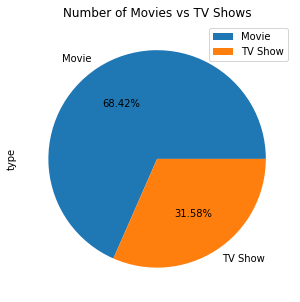

In [11]:
type_df = pd.DataFrame(netflix_titles_df['type'].value_counts())
type_df.plot.pie(y='type', figsize=(5, 5), autopct='%1.2f%%')
plt.title("Number of Movies vs TV Shows")

### The histogram shows the number of Movies/TV Shows according to their year of release:

Here we directly form a histogram to count number of movies released each year between 2000 and 2020.

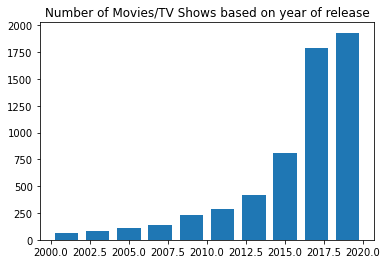

In [12]:
plt.title("Number of Movies/TV Shows based on year of release")
plt.hist(netflix_titles_df.release_year, rwidth=0.75, range=[2000,2020]);

This histogram shows how the number of releases has exponentially increased in recent years showing the increasing popularity of the platform.

### The histogram shows how the duration of movies vary:

Here we first form a new dataframe taking only movies in which we remove the 'min' part from the duration and convert it into integer values from strings which allows us to analyze it. Then we represent the duration with a histogram. 

(array([8.900e+01, 3.460e+02, 1.521e+03, 1.685e+03, 5.020e+02, 1.060e+02,
        1.300e+01, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  3. ,  33.9,  64.8,  95.7, 126.6, 157.5, 188.4, 219.3, 250.2,
        281.1, 312. ]),
 <BarContainer object of 10 artists>)

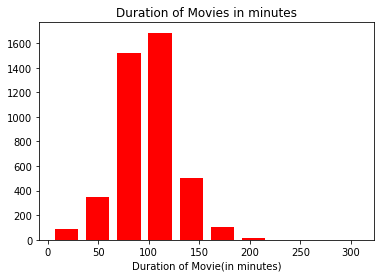

In [13]:
movies_df = netflix_titles_df.loc[netflix_titles_df['type'] == 'Movie']
pd.options.mode.chained_assignment = None
movies_df['duration'] = pd.to_numeric(movies_df['duration'].astype(str).str[:-4], errors='coerce')
plt.title("Duration of Movies in minutes")
plt.xlabel('Duration of Movie(in minutes)')
plt.hist(movies_df.duration, rwidth=0.75, color = "red")

This histogram shows that most movies are around 100-120 minutes long.

### The histogram shows how to number of seasons for TV shows vary:

Here we first form a new dataframe taking only TV shows in which we remove the 'Season'/'Seasons' part from the duration and convert it into integer values from strings which allows us to analyze it. Then we represent the number of seasons with a histogram. 

(array([1625.,  158.,  107.,   22.,   21.,   23.,    3.,    5.,    2.,
           3.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

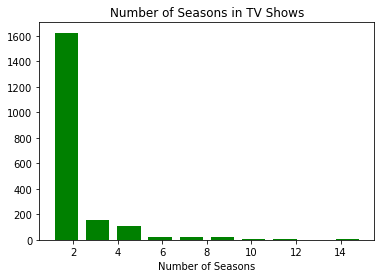

In [14]:
shows_df = netflix_titles_df.loc[netflix_titles_df['type'] == 'TV Show']
pd.options.mode.chained_assignment = None
shows_df['duration'] = shows_df['duration'].str.replace('Seasons', '')
shows_df['duration'] = shows_df['duration'].str.replace('Season', '')
shows_df['duration'] = shows_df['duration'].astype(int)
plt.title("Number of Seasons in TV Shows")
plt.xlabel('Number of Seasons')
plt.hist(shows_df.duration, rwidth=0.75, color = "green")

This histogram shows that most of the TV shows on the platform have 1-2 seasons.

### The bar graph shows the number of Movies/TV Shows for each type of rating:

Here we represent the number of Movies/TV Shows by the type of ratings they have in a bar chart.

Text(0.5, 1.0, 'Number of Movies/Shows for each type of rating')

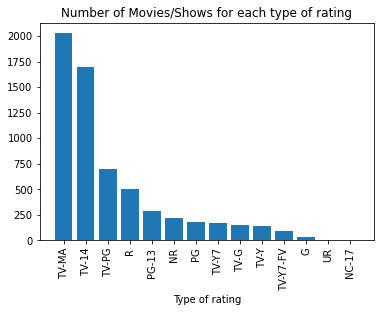

In [15]:
rating_df = pd.DataFrame(netflix_titles_df['rating'].value_counts())
plt.xticks(rotation=90)
plt.bar(rating_df.index, rating_df.rating, data=rating_df)
plt.xlabel('Type of rating')
plt.title('Number of Movies/Shows for each type of rating')

This bar graph shows that most of the content on Netflix in TV-MA rated followed by TV-14.

### The pie chart shows the distribution of Movies/TV Shows for each type of rating:

Here we represent the proportion of Movies/TV Shows by the type of ratings they have in a pie chart.

Text(0.5, 1.0, 'Piechart of Movies/Shows for each type of rating')

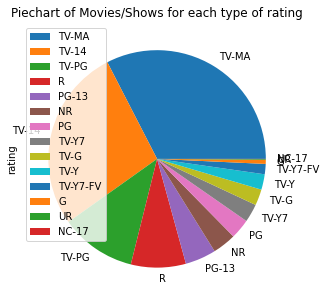

In [16]:
rating_df.plot.pie(y='rating', figsize=(5, 5))
plt.title('Piechart of Movies/Shows for each type of rating')

### The bar graph shows number of Movies/TV Shows for the 10 most pupular genre/genre-combinations:

Here we show the number of Movies/TV Shows for the top 10 most popular genre/genre-combinations.

Text(0.5, 1.0, 'Number of Movies/Shows for the 10 most popular genre/genre-combinations')

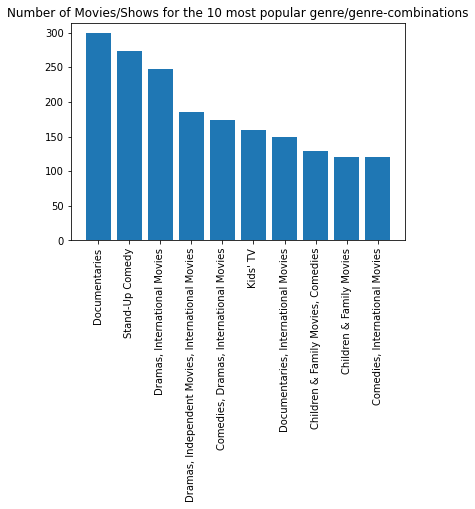

In [17]:
genre_df = pd.DataFrame(netflix_titles_df['listed_in'].value_counts())
genre_df = genre_df.nlargest(10,['listed_in'])
plt.xticks(rotation=90)
plt.bar(genre_df.index, genre_df.listed_in, data=genre_df)
plt.title('Number of Movies/Shows for the 10 most popular genre/genre-combinations')

This bar graph shows that documentaries and stand-up comedy are the top genre/genre-combinations

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Asking and Answering Questions

### What is the number of Movies and TV Shows on Netflix?

Here we find the number of movies and TV shows by using the value_counts function.

In [127]:
num_of_movies = netflix_titles_df.type.value_counts()['Movie']
num_of_shows = netflix_titles_df.type.value_counts()['TV Show']

### Answer:

The total nuumber of movies on Netflix is 4265 and that of TV shows is 1969.


<AxesSubplot:ylabel='type'>

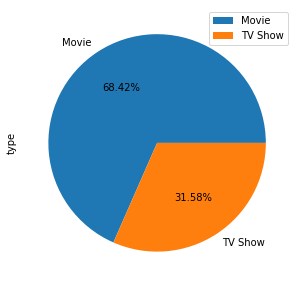

In [137]:
print('The total nuumber of movies on Netflix is {} and that of TV shows is {}.'.format(num_of_movies, num_of_shows))
type_df.plot.pie(y='type', figsize=(5, 5), autopct='%1.2f%%')

### Which year had the highest number of releases and how many ?

Here we make a dataframe of number of releases every year.

In [136]:
releases_df = pd.DataFrame(netflix_titles_df['release_year'].value_counts())
releases_df

,release_year
2018,1063
2017,959
2019,843
2016,830
2015,517
...,...
1959,1
1963,1
1964,1
1956,1


### Answer:

In [134]:
print("The year {} had the highest number of releases i.e {}.".format(release_df.index[0], release_df.release_year.max()))

The year 2018 had the highest number of releases i.e 1063.


### Which is the longest movie on Netflix and how long is it?

This gives the maximum value of duration from the movies_df dataframe.

In [100]:
movies_df.duration.max()

312

This finds the index number of the row which contains the maximum duration.

In [98]:
movies_df[movies_df['duration'] == 312].index

Int64Index([4315], dtype='int64')

### Answer:

In [101]:
print('The longest movie on Netflix is {} and it is {} minutes long.' .format (movies_df.title[4315], movies_df.duration.max()))

The longest movie on Netflix is Black Mirror: Bandersnatch and it is 312 minutes long.


### How many documentaries are there on Netflix?

Here we make a dataframe of number of movies/TV shows for each type of genre/genre-combinations.

In [115]:
listed_df = pd.DataFrame(netflix_titles_df['listed_in'].value_counts())
listed_df

,listed_in
Documentaries,299
Stand-Up Comedy,273
"Dramas, International Movies",248
"Dramas, Independent Movies, International Movies",186
"Comedies, Dramas, International Movies",174
...,...
"Reality TV, Spanish-Language TV Shows",1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Documentaries, Sports Movies",1
"International Movies, Sports Movies",1


### Answer:

In [131]:
print("Netflix has a total of {} documentaries.".format(listed_df.listed_in[0]))

Netflix has a total of 299 documentaries.


### Which individual country has the highest number of releases and how many?

Here we make a dataframe of number of releases from each country/combination of countries.

In [122]:
country_df = pd.DataFrame(netflix_titles_df['country'].value_counts())
country_df

,country
United States,2032
India,777
United Kingdom,348
Japan,176
Canada,141
...,...
"Lebanon, Qatar",1
"United States, India, Malaysia, Taiwan, Canada, United Kingdom",1
Cambodia,1
"Argentina, Uruguay, Serbia",1


### Answer:

In [123]:
print("{} has the highest number of releases counting to {}".format(country_df.index[0], country_df.country[0]))

United States has the highest number of releases counting to 2032


### How long will it take to watch all the movies on Netlfix?

This calculates the total combined length of all movies on Netflix in minutes

In [149]:
movies_df.duration.sum()

422665

### Answer:

In [148]:
print("It will take {:.2f} days to watch all the movies on Netflix.".format(movies_df.duration.sum()/(60*24)))

It will take 293.52 days to watch all the movies on Netflix.


In [9]:
import jovian

In [138]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohamy11/netflix-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohamy11/netflix-analysis


'https://jovian.ml/sohamy11/netflix-analysis'

## Inferences and Conclusion

From this analysis we can state the following conclusions:

- Netflix has a total of 4265 movies and 1969 TV Shows.
- Highest number of releases were in the year 2018.
- United States has more content on Netflix than any other country.
- Black Mirror: Bandersnatch is the longest movie on  Netflix and it is 312 minutes long.
- The number of releases has exponentially increased in the past 5 years.
- Most TV Shows have 1-2 seasons according to the histogram.
- Most movies are 100-120 minutes long according to the histogram.
- Most of the content is TV-MA rated.
- There are 299 documentaries on Netflix.

In [11]:
import jovian

In [150]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sohamy11/netflix-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/sohamy11/netflix-analysis


'https://jovian.ml/sohamy11/netflix-analysis'

## References and Future Work

Dataset source: https://www.kaggle.com/shivamb/netflix-shows

Future work: I would try to find a dataset and analyse it specifically on the basis of genre and would try to determine a trend as in how the popularity of various genre has changed in the last two decades based on the number of releases for each one of them.

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
